# Task 1. Set up an "Analysis Pipeline" 

My partner and I both completed Task 1 and Task 2 together. We participated in peer programming to ensure we set up a promising analysis pipeline. Additionally, we made sure the method chaining works so the data is processed well and other attributes from project_functions are used. 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('../scripts/')
import project_functions as pf
from pandas_profiling import ProfileReport

## Set the Theme

In [2]:
sns.set_theme(style = 'white', font_scale = 1.2)

## 1. Load Data

In [3]:
# This will be used briefly during the EDA
df_raw = pd.read_csv('../../data/raw/anime.csv')

## 2. Clean Data/ Method Chaining

In [4]:
df1 = (
    df_raw
)

df1 = df1[df1 != 'Unknown']

clean_anime_df = (
    df1
    .drop(columns = ['MAL_ID', 'Producers', 'Licensors', 'English name', 'Japanese name'])
    .dropna(axis = 'rows')
    .rename(columns = {'Duration': 'Duration (Minutes)'})
    .reset_index(drop = True)
)

## 3. Process Data

In [5]:
# converting the whole column to minutes
for ind in clean_anime_df.index:
    clean_anime_df.loc[ind, "Duration (Minutes)"] = pf.convert(clean_anime_df["Duration (Minutes)"][ind])

# Task 2. Can be found under the scripts -> project_functions.py

For the method chaining, JQ and I participated in peer programming. We set up the scripts folder together. 

## Test Functions Created Which are Used in the project_functions.py  

In [6]:
def convert(episodeLength):
    episodeLength = episodeLength.split()
    if episodeLength[1] == 'hr.':
        return (int(episodeLength[0]) * 60) + int(episodeLength[2]) 
    elif episodeLength[1] == 'min.':
        return int(episodeLength[0])
    else:
        return 0

    
def returnList(df, column):
    return df[column].tolist()


def countOccurances(listOfGenres):
    counts = {}
    for key in listOfGenres:
        if key in counts:
            counts[key] += 1
        else:
            counts[key] = 1
    return counts


def countWordsInDict(dictonary):
    counts = {}
    for key in dictonary:
        words = key.split(', ')
        for word in words:
            if word in counts:
                counts[word] += 1
            else:
                counts[word] = 1
    return counts
 
    
def dictToLists(dictonary):
    lists = []
    for key, value in dictonary.items():
        lists.append([key, value])
    return lists

# Task 3. Exploratory Data Analysis (EDA) 

My partner and I both completed an EDA independently to explore different features of our dataset. Additionally, we informed each other about discoveries to learn more information about our dataset. 

## Loading the clean data using the load_and_process attribute from project_functions.py


In [7]:
anime_df = pf.load_and_process(pd.read_csv('../../data/raw/anime.csv'))

## Preliminary Data Processing
We are generating a simplistic view of our dataset

In [8]:
anime_df.info()
anime_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3306 entries, 0 to 17469
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                3306 non-null   object
 1   Score               3306 non-null   object
 2   Genres              3306 non-null   object
 3   Type                3306 non-null   object
 4   Episodes            3306 non-null   object
 5   Aired               3306 non-null   object
 6   Premiered           3306 non-null   object
 7   Studios             3306 non-null   object
 8   Source              3306 non-null   object
 9   Duration (Minutes)  3306 non-null   object
 10  Rating              3306 non-null   object
 11  Ranked              3306 non-null   object
 12  Popularity          3306 non-null   int64 
 13  Members             3306 non-null   int64 
 14  Favorites           3306 non-null   int64 
 15  Watching            3306 non-null   int64 
 16  Completed           330

,Name,Score,Genres,Type,Episodes,Aired,Premiered,Studios,Source,Duration (Minutes),...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Sunrise,Original,24,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Madhouse,Manga,24,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,Sunrise,Original,25,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,Toei Animation,Manga,23,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
5,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",TV,145,"Apr 6, 2005 to Mar 19, 2008",Spring 2005,Gallop,Manga,23,...,9226.0,14904.0,22811.0,16734.0,6206.0,2621.0,795.0,336.0,140.0,151.0


In [9]:
anime_df.shape

(3306, 30)

### Preliminary Notes:

- Our data contains 3306 entries with 30 columns
- The row count has reduced significantly from the original of 17562.
- We have cleaned up our data, so there are no NaN values
- We have converted all of the Duration to be a unit of minutes instead of hours and minutes


## Diving into More Detail

In [10]:
anime_df.columns

Index(['Name', 'Score', 'Genres', 'Type', 'Episodes', 'Aired', 'Premiered',
       'Studios', 'Source', 'Duration (Minutes)', 'Rating', 'Ranked',
       'Popularity', 'Members', 'Favorites', 'Watching', 'Completed',
       'On-Hold', 'Dropped', 'Plan to Watch', 'Score-10', 'Score-9', 'Score-8',
       'Score-7', 'Score-6', 'Score-5', 'Score-4', 'Score-3', 'Score-2',
       'Score-1'],
      dtype='object')

In [11]:
anime_df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
Popularity,3306.0,3386.106473,2960.277736,1.0,1026.75,2525.5,4940.75,12953.0
Members,3306.0,136159.507562,249143.072151,363.0,9833.75,40423.0,144790.25,2589552.0
Favorites,3306.0,2090.861162,8684.466169,0.0,22.00,141.0,836.25,183914.0
Watching,3306.0,9885.641258,26374.033754,12.0,525.00,2430.0,9132.25,566239.0
Completed,3306.0,85880.777374,184813.635559,0.0,3774.00,18876.5,77365.50,2182587.0
On-Hold,3306.0,4314.740472,8286.632403,4.0,386.25,1551.0,4880.75,130961.0
Dropped,3306.0,5505.506050,9230.437097,16.0,570.00,2216.0,6951.00,174710.0
Plan to Watch,3306.0,30572.842408,43747.139267,102.0,3238.50,12547.0,40112.00,425531.0


In [12]:
anime_df.describe(exclude = [np.number]).T

,count,unique,top,freq
Name,3306,3306,Cowboy Bebop,1
Score,3306,408,7.36,26
Genres,3306,2079,"Slice of Life, Comedy",41
Type,3306,1,TV,3306
Episodes,3306,153,12,1131
Aired,3306,2542,"Oct 5, 2016 to Dec 21, 2016",9
Premiered,3306,203,Fall 2016,67
Studios,3306,489,Toei Animation,164
Source,3306,15,Manga,1298
Duration (Minutes),3306,37,24,1384


### More Notes:

- The most frequently appearing anime genre is Slice of Life, Comedy
- The season Fall 2016 contained the most anime premiers in 67 animes released
- Manga is the most popular source of anime
- The most common rating is PG-13
- Total Animation is the most popular studio
- The minimum number of members watching an anime currently is 12. This means that everyone who has an account on MyAnimeList is currently watching an anime in some form


## Even More Advanced Analytics

In [13]:
ProfileReport(anime_df, title = "Pandas Profiling Anime Report")

Summarize dataset:   0%|          | 0/44 [00:00<?, ?it/s]

KeyboardInterrupt: 

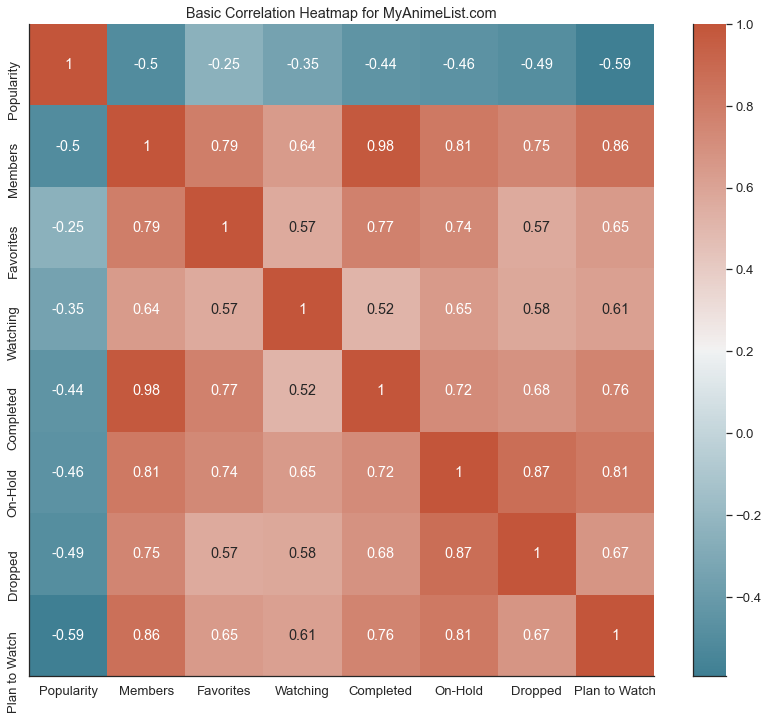

In [14]:
# Source: https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e
plt.subplots(figsize = (14, 12))
corr = anime_df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title("Basic Correlation Heatmap for MyAnimeList.com")
sns.despine()

### Heatmap Analysis:
There are three interesting points I found from this heatmap:

1. The first data point that caught my eye was the positive correlation between an anime on hold and an anime being dropped. On the surface level, this tells me that the more likely you are to put an anime on hold, the more likely you are to drop that anime. Intuitively this makes sense because putting a show on the backburner raises the risk of finding another anime you can replace watching that show (in this case, anime). 

2. The popularity category is interesting. It seems to have a negative correlation with every other data point. The one that stands out the most is that popularity negatively correlates with the "Favorites" section. Typically, favorites are generally popular among communities (from food to video games to tv shows). However, in this case, the heatmap is telling us a popular anime is not favorable. This information would be worth exploring further to see why that is the case and even if it is valid. 

3. Another exciting point is that the highest correlation on this heatmap is the positive correlation between members and anime completed at 0.98. Not only does this fit in the range of 5%, but it also means that most members on this website have completed at least one anime series while holding an account. We can back this correlation up (very loosely) with a point we found while starting the exploratory data analysis. There are currently no members not watching an anime. As the minimum number of people presently watching is 12. This is a small but worthy point to back up the claim most members on the website have completed an anime.

In [15]:
rank_score_df = anime_df[['Name', 'Ranked', 'Score', 'Popularity']].sort_values(by = 'Score', ascending = False).reset_index(drop = True)
rank_score_df

,Name,Ranked,Score,Popularity
0,Fullmetal Alchemist: Brotherhood,1.0,9.19,3
1,Shingeki no Kyojin: The Final Season,2.0,9.17,119
2,Steins;Gate,3.0,9.11,9
3,Gintama°,5.0,9.1,329
4,Shingeki no Kyojin Season 3 Part 2,4.0,9.1,63
...,...,...,...,...
3301,Mahou Shoujo? Naria☆Girls,10997.0,3.84,5844
3302,Hanoka,11020.0,3.67,7495
3303,Pupa,11045.0,3.41,997
3304,Vampire Holmes,11016.0,3.38,3993


In [ ]:
rank_score_df.convert_dtypes().dtypes

Name          string
Ranked        string
Score         string
Popularity     Int64
dtype: object

In [ ]:
# Source: https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# test.convert_dtypes().dtypes
rank_score_df = rank_score_df.astype({"Ranked": float, "Score": float})  
test.convert_dtypes().dtypes

Name           string
Ranked          Int64
Score         Float64
Popularity      Int64
dtype: object

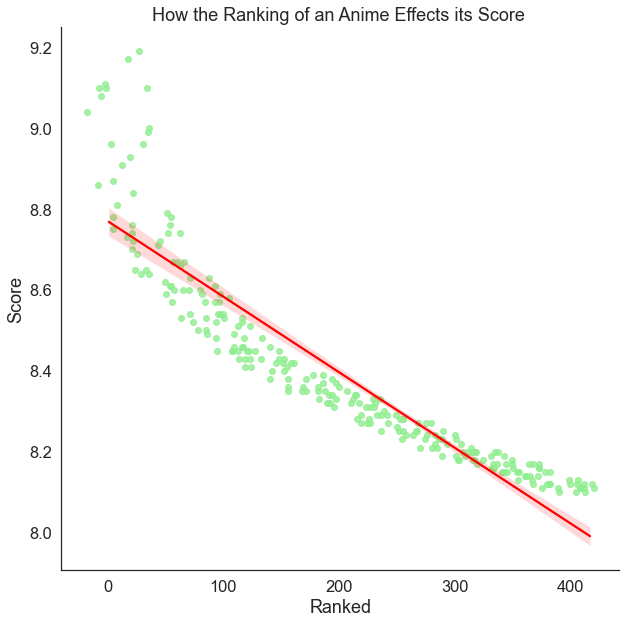

In [ ]:
# Source: https://stackoverflow.com/questions/48145924/different-colors-for-points-and-line-in-seaborn-regplot
plt.subplots(figsize = (10, 10))
sns.regplot(x = "Ranked", y = "Score", data = rank_score_df.head(250), x_jitter = 30, line_kws = {"color": "red"}, scatter_kws = {"color": "lightgreen"})
plt.title("How the Ranking of an Anime Effects its Score ")
sns.despine()

### Regression Plot Analysis:
`Source: https://myanimelist.net/forum/?topicid=1294711`

This is a simple regression plot of the top-ranked 250 animes. I was curious to see how related the score and the ranking of an anime are. This came to mind because when I watch movies, I come across movies with low ranking but that I tended to enjoy them. The score variable is similar to the calculated weighted score from the Pokemon lab. According to myanimelist, this is how the anime scores are calculated:

> Weighted Rank (WR) = (v / (v + m)) * S + (m / (v + m)) * C

> S = Average score for the Anime (mean).

> v = Number of votes for the Anime = (Number of people scoring the Anime).

> m = Minimum votes/scores required to get a calculated score (currently 50 scores required).

> C = The mean score across the entire Anime DB.

Overall, we see that the lower the ranking of an anime, the lower the score drops. Personally, this is something I expected, but it was nice to see with the graph. A conclusion that can be obtained is an anime consumer can choose to either look at the ranking or the score of an anime to decide what to watch next as both will provide similar output. 


In [ ]:
# episodes_anime_df = anime_df['Episodes'].unique()
episodes_anime_df = anime_df.groupby('Episodes').().sort_values(by = 'Episodes', ascending = False).reset_index(drop = True)
episodes_anime_df

### A table of how many people enjoy the source of the anime contents

In [ ]:
summary = df.groupby('Source',as_index = False).sum().reset_index(drop = True)
summary

# Task 4. Conduct Analysis to Help Answer Research Questions

The questions I am in charge of answering is:

1. Finding the most popular genre combination of animes2. Finding the most popular genre combination of animes

2. Finding the correlation between the rating of an anime and the number of episodes produced: We want to see how the number of episodes of an anime affects its rating.

### 1. Finding the Most Popular Genre Combination of Animes by Number of Completions 

In [130]:
genre_combo_df = anime_df.groupby('Genres', as_index = False).sum()[['Genres','Completed']].sort_values(by = 'Completed', ascending = False)
genre_combo_df

,Genres,Completed
548,"Action, Military, Mystery, Super Power, Drama,...",4511947
422,"Action, Game, Adventure, Romance, Fantasy",4058966
291,"Action, Comedy, Super Power, School, Shounen",3114497
1497,"Ecchi, School, Shounen",2844561
1926,"Slice of Life, Comedy, Drama, Romance, School",2840098
...,...,...
1338,"Comedy, Sports, Drama, School",7
1260,"Comedy, Psychological, Supernatural, Shounen",7
1690,"Military, Sci-Fi, Slice of Life, Comedy",5
1840,"Sci-Fi, Adventure, Mystery, Fantasy, Shoujo Ai",2


In [51]:
genres_order = anime_df.groupby('Genres', as_index = False)['Completed'].sum().sort_values(by = 'Completed', ascending = False).reset_index(drop = True)
topTenGenreCombo = genres_order['Genres'].head(10).tolist()

In [52]:
genres_order.head(10)

,Genres,Completed
0,"Action, Military, Mystery, Super Power, Drama,...",4511947
1,"Action, Game, Adventure, Romance, Fantasy",4058966
2,"Action, Comedy, Super Power, School, Shounen",3114497
3,"Ecchi, School, Shounen",2844561
4,"Slice of Life, Comedy, Drama, Romance, School",2840098
5,"Comedy, Sports, Drama, School, Shounen",2821456
6,"Action, Mystery, Horror, Psychological, Supern...",2667459
7,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",2507615
8,"Action, Adventure, Comedy, Super Power, Martia...",2327866
9,"Mystery, Police, Psychological, Supernatural, ...",2146116


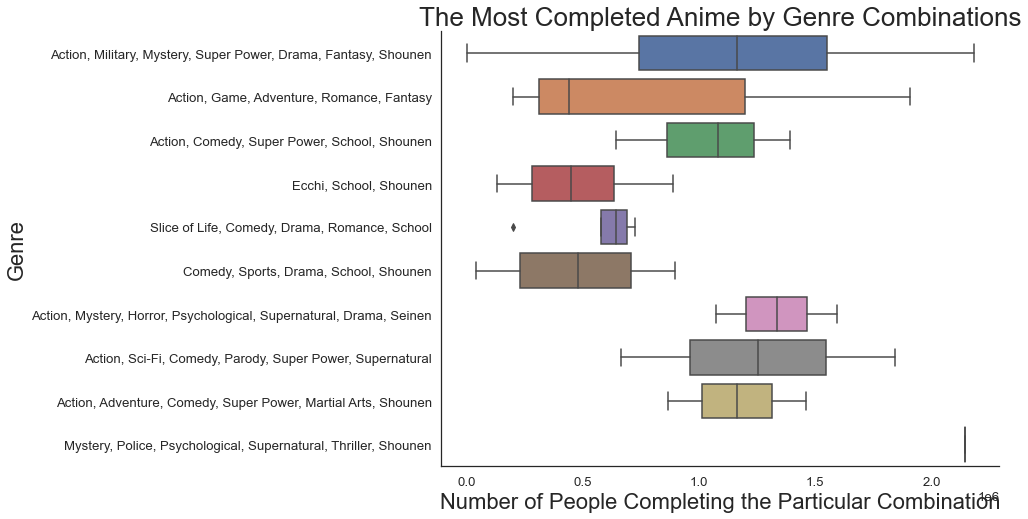

In [53]:
plt.subplots(figsize = (10, 8))
sns.boxplot(x = 'Completed', y = 'Genres', orient = 'h', data = anime_df, order = topTenGenreCombo)
plt.xlabel("Number of People Completing the Particular Combination", fontsize = 22)
plt.ylabel("Genre", fontsize = 22)
plt.title("The Most Completed Anime by Genre Combinations", fontsize = 26)
sns.despine()